In [1]:
!pip install gif
!wget https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/gif_utils.py
import gif, gif_utils
import matplotlib.pyplot as plt

@gif.frame
def plot_f(X, y, yhat, loss):
  plt.figure(figsize=(8, 6))
  plt.scatter(X.numpy(), y.numpy(), color='blue')
  plt.plot(X.numpy(), yhat.detach().numpy(), color='red')
  plt.ylim(0,20)
  plt.title(f'Step {i}: loss={loss.item():.2f}')
  plt.xlabel('X')
  plt.ylabel('Y')

@gif.frame
def plot_gd(X, y, yhat, loss):
  plt.figure(figsize=(5, 4))
  plt.scatter(yhat, y)
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='y=x line')
  plt.title(f'Step {i}: loss={loss.item():.2f}')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')


/bin/bash: /usr/local/bin/pip: /usr/bin/python: bad interpreter: No such file or directory
--2025-10-14 11:59:01--  https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/gif_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1591 (1.6K) [text/plain]
Saving to: ‘gif_utils.py.5’

gif_utils.py.5      100%[===================>]   1.55K  --.-KB/s    in 0s      

2025-10-14 11:59:01 (4.77 MB/s) - ‘gif_utils.py.5’ saved [1591/1591]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel

In [2]:
import torch
import numpy as np

In [3]:
# Create a tensor with python list
x = torch.tensor([1.0, 2.0, 3.0])
x

tensor([1., 2., 3.])

In [4]:
# Get the shape and datatype of a tensor
x.shape, x.dtype

(torch.Size([3]), torch.float32)

In [5]:
# Interchange between numpy arrays and pytorch tensors
import numpy as np
y = torch.tensor(np.array([2.0, 3.0, 4.0]))
print(y)

z = torch.from_numpy(np.array([0.0, 1.0, 2.0]))
print(z)

print(y.numpy())
print(z.numpy())

tensor([2., 3., 4.], dtype=torch.float64)
tensor([0., 1., 2.], dtype=torch.float64)
[2. 3. 4.]
[0. 1. 2.]


In [6]:
# Create a multi-dimensional tensor
m = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))
print(m)

# Zero and one tensors
torch.zeros(2, 3), torch.ones(2, 3)

tensor([[1, 2, 3],
        [4, 5, 6]])


(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]))

In [7]:
# Tensors filled with random values from 0 to 1
torch.random.manual_seed(42) # So that you see the same result :)
torch.rand(2, 3)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

In [8]:
x,y

(tensor([1., 2., 3.]), tensor([2., 3., 4.], dtype=torch.float64))

In [9]:
# Addition
print(x + y) # Notice the datatype of the result

# Subtraction
print(x - y)

# Multiplication (pairwise product)
print(x * y)

# Division
print(x / y)

# Exponentiation
print(x ** y)

tensor([3., 5., 7.], dtype=torch.float64)
tensor([-1., -1., -1.], dtype=torch.float64)
tensor([ 2.,  6., 12.], dtype=torch.float64)
tensor([0.5000, 0.6667, 0.7500], dtype=torch.float64)
tensor([ 1.,  8., 81.], dtype=torch.float64)


In [10]:
# max/min/mean
x = torch.tensor([[1.,2.,3.], [8.,9.,10.]])
print(x.max(), x.min(), x.mean())

x_arr = np.array([[1.,2.,3.], [8.,9.,10.]])
print(x_arr.max(), x_arr.min(), x_arr.mean())

tensor(10.) tensor(1.) tensor(5.5000)
10.0 1.0 5.5


In [11]:
print(m)
transpose = m.T
#transpose.view(-1,1)

transpose.reshape(-1,1)

tensor([[1, 2, 3],
        [4, 5, 6]])


tensor([[1],
        [4],
        [2],
        [5],
        [3],
        [6]])

In [12]:
m = torch.tensor([[1, 4, 6], [2, 5, 3]], dtype=torch.float32)
column_mean = torch.mean(m, dim=0)
row_mean = torch.mean(m, dim=1)
global_mean = torch.mean(m)
column_mean, row_mean, global_mean

(tensor([1.5000, 4.5000, 4.5000]), tensor([3.6667, 3.3333]), tensor(3.5000))

In [13]:
m = torch.rand(2, 2, 3) # 2 slices, each size being 2 * 3
print(m)

print(m[:,1,:]) # Second row, all columns of all slices

tensor([[[0.2566, 0.7936, 0.9408],
         [0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411],
         [0.4294, 0.8854, 0.5739]]])
tensor([[0.1332, 0.9346, 0.5936],
        [0.4294, 0.8854, 0.5739]])


In [14]:
m[-1, :, 1:] # Last slice, all rows, column starting from the second column

tensor([[0.5677, 0.7411],
        [0.8854, 0.5739]])

In [15]:
# Concatenations
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0, 6.0])
print(torch.cat((x, y)))

# vstack: stack vertically (row-wise)
print(torch.vstack((x, y)))

# hstack: stack horizontally (column-wise)
print(torch.hstack((x, y)))

tensor([1., 2., 3., 4., 5., 6.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1., 2., 3., 4., 5., 6.])


In [16]:
# Matrix multiplication
A = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)
B = torch.tensor([[5, 6, 7, 8], [7, 8, 9, 10]], dtype=torch.float32)
A.shape, B.shape

(torch.Size([3, 2]), torch.Size([2, 4]))

In [17]:
# Use @ or matmul for matrix multiplication
A @ B, torch.matmul(A, B)

(tensor([[ 19.,  22.,  25.,  28.],
         [ 43.,  50.,  57.,  64.],
         [ 67.,  78.,  89., 100.]]),
 tensor([[ 19.,  22.,  25.,  28.],
         [ 43.,  50.,  57.,  64.],
         [ 67.,  78.,  89., 100.]]))

In [18]:
A = torch.tensor([1,1,1])
B = torch.tensor([2,2,2])
A @ B

tensor(6)

In [19]:
# Dot product between 1D vectors with `dot` function
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
torch.dot(x, y)

tensor(32)

In [20]:
# Convert datatype for tensors
x = torch.tensor([1.0, 2.0, 3.0])
x.dtype

torch.float32

In [21]:
# Use `to` to convert type
x = x.to(torch.int32)
x.dtype

torch.int32

In [22]:
# Gradient for addition
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True) # Set requires_grad = True to let pytorch track the gradient
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

z = x**2 + y # Now z has gradient w.r.t x
z.sum().backward() # Do "backpropagation," pytorch will now calculate gradient of z w.r.t x
print(x.grad) # The gradient of z w.r.t x
print(y.grad) # The gradient of z w.r.t y

tensor([2., 4., 6.])
tensor([1., 1., 1.])


In [23]:
# zero gradients
x.grad.zero_()
y.grad.zero_()

z = x**2 + y
z.backward(gradient=torch.tensor([1., 1., 1.])) # can either specific dim of vector or use .sum()
print(x.grad)
print(y.grad)

tensor([2., 4., 6.])
tensor([1., 1., 1.])


In [24]:
# 1. Shape mismatch
# Shape mismatch in pairwise operations
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0])
x + y

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [26]:
# Shape mismatch in matrix multiplication
W = torch.rand(3, 2)
x = torch.rand(1, 2)

W,x,W @ x # W @ x.reshape(-1, 1) will work

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 1x2)

In [25]:
X = torch.tensor([1, 2, 3], dtype=torch.float)
y = X * 4 + 2

noise = 0.5 * torch.randn_like(y)
y += noise

In [26]:
m = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
m, b

(tensor([0.3588], requires_grad=True), tensor([0.1994], requires_grad=True))

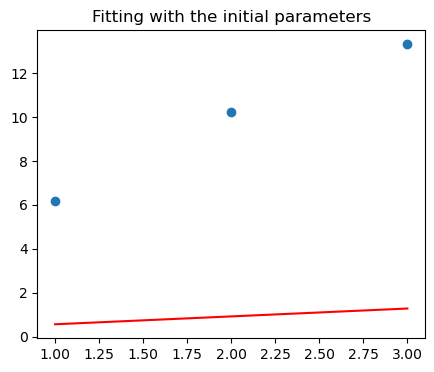

In [27]:
y_hat = X * m.item() + b
plt.figure(figsize=(5, 4))
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), y_hat.detach().numpy(), c='r') # detach() creates a new tensor that does not require gradient tracking
plt.title("Fitting with the initial parameters")
plt.show();

In [28]:
a = X * m
a.retain_grad()

y_hat = a + b
y_hat.retain_grad()

d = y - y_hat
d.retain_grad()

loss = torch.sum(1 / 2 * (d ** 2)) # SSE

In [29]:
loss.backward()

In [30]:
d.grad, d

(tensor([ 5.6383,  9.2994, 12.0428]),
 tensor([ 5.6383,  9.2994, 12.0428], grad_fn=<SubBackward0>))

In [31]:
y_hat.grad, -d

(tensor([ -5.6383,  -9.2994, -12.0428]),
 tensor([ -5.6383,  -9.2994, -12.0428], grad_fn=<NegBackward0>))

In [32]:
b.grad, -d.sum()

(tensor([-26.9805]), tensor(-26.9805, grad_fn=<NegBackward0>))

In [33]:
a.grad, -d

(tensor([ -5.6383,  -9.2994, -12.0428]),
 tensor([ -5.6383,  -9.2994, -12.0428], grad_fn=<NegBackward0>))

In [34]:
m.grad, torch.sum(-d * X)

(tensor([-60.3656]), tensor(-60.3656, grad_fn=<SumBackward0>))

In [35]:
alpha = 0.1
m.data -= alpha * m.grad
b.data -= alpha * b.grad

# Clear the gradients so that they don't get carried over
m.grad.zero_()
b.grad.zero_()

# Let's see how we are doing
m.item(), b.item()

(6.395371913909912, 2.8974180221557617)

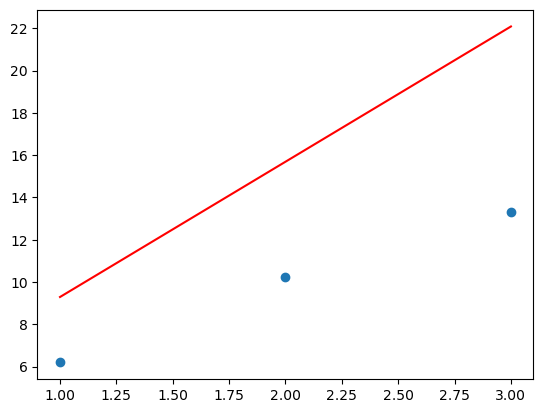

In [36]:
y_hat = X * m.item() + b
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), y_hat.detach().numpy(), c='r');

In [37]:
# Do more gradient descent steps
def step(X, y, m, b, lr):
    # do the forward pass
    y_hat = m * X + b

    # calculate the loss
    loss = 1/2 * (y_hat - y).pow(2).sum()

    # compute the gradient of the loss wrt parameters
    loss.backward()

    # update the model parameters
    m.data -= lr * m.grad
    b.data -= lr * b.grad

    # clear the gradients
    m.grad.zero_()
    b.grad.zero_()

    return m, b, loss

In [38]:
alpha=0.1
m = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
frames = []

for i in range(15):
    m, b, loss = step(X, y, m, b, alpha)
    yhat = m * X + b
    frames.append(plot_f(X, y, yhat, loss))

gif.save(frames, "grad_descent.gif", duration=1000)
print(m.item())
print(b.item())

3.8781235218048096
2.088312864303589


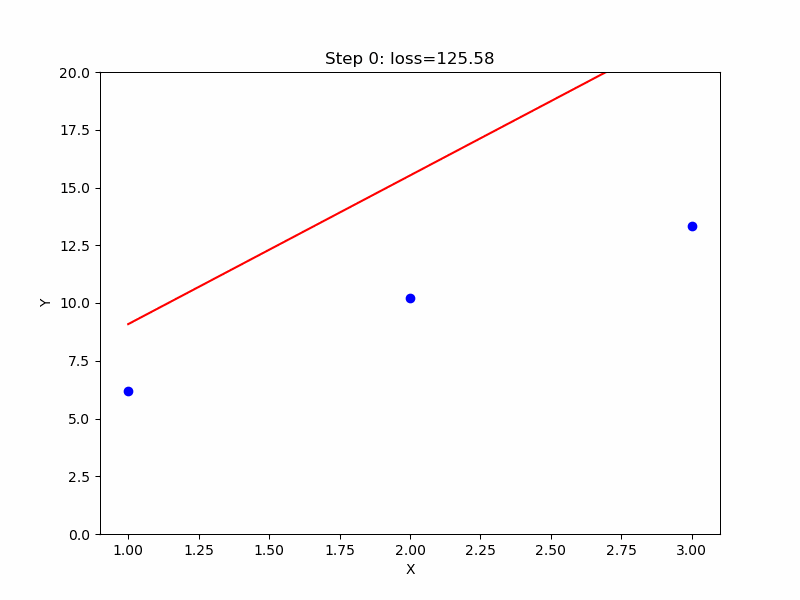

In [39]:
from IPython.display import Image, display

display(Image(filename='grad_descent.gif'))

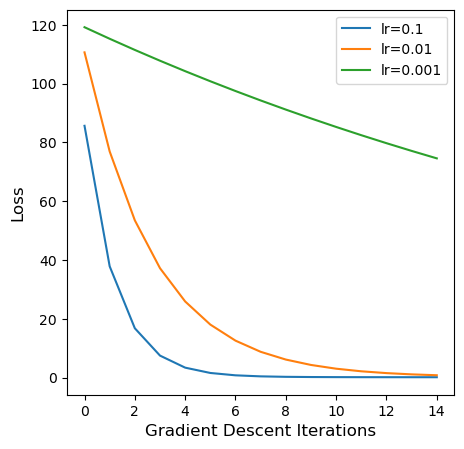

In [40]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

alphas=[0.1, 0.01, 0.001]
torch.random.manual_seed(42)

for a in alphas:
  loss_arr = np.ones(15)
  m = torch.rand(1, requires_grad=True)
  b = torch.rand(1, requires_grad=True)

  for i in range(15):
      m, b, loss = step(X, y, m, b, a)
      loss_arr[i] = loss
  ax.plot(loss_arr, label=f'lr={a}')

ax.set_xlabel('Gradient Descent Iterations', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend()

In [41]:
class dog:
  def __init__(self, owner, energy):
    self.energy = energy
    self.owner = owner

  def walk(self, walk_length):
    self.energy -= 0.5 * walk_length # time in minutes

  def eat_treats(self, num_treats):
    self.energy += 10 * num_treats

  def bark(self):
    print(f'ruff! {self.owner} pay attention to me!')

In [42]:
Pakora = dog('Pratyush', 200)
Spot = dog('Lukas', 100)

Pakora.bark()

Pakora.walk(60)
print(Pakora.energy)

Pakora.eat_treats(1)
print(Pakora.energy)

ruff! Pratyush pay attention to me!
170.0
180.0


In [43]:
class puppy(dog):
  def __init__(self, breed, owner, energy):
      super(puppy, self).__init__(owner, energy)
      self.breed = breed

  def walk(self, walk_length):
    if walk_length > 20:
      print("too far! I'm too little!")

In [44]:
Rex = puppy('Border Collie', 'Sanjay', 500)
Rex.walk(60)
Rex.bark()

print(Rex.breed)

too far! I'm too little!
ruff! Sanjay pay attention to me!
Border Collie


In [45]:
import torch.nn as nn

# Custom model inheriting from torch.nn.Module
class myModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(myModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

In [46]:
def tensor_to_numpy(tensor):
  return tensor.detach().cpu().numpy()

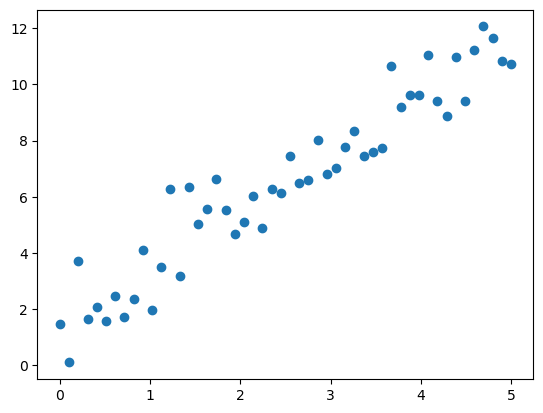

In [47]:
# Create a simple dataset
X = torch.linspace(0, 5, 50)
y = 2 * X + 1.5 + torch.randn(50)

plt.scatter(tensor_to_numpy(X), tensor_to_numpy(y));

In [50]:
import torch.nn as nn

class SingleVariableLinearRegression(nn.Module): # All models must inherit nn.Module
  def __init__(self):
    super().__init__()
    # use random values as initial parameter value
    # set requires_grad=True to let pytorch track their gradients
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

  # Override forward function to define how prediction is made by the model
  def forward(self, x):
    return self.weight * x + self.bias

In [51]:
net = SingleVariableLinearRegression()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [52]:
import gif
import gif_utils

epochs = 50
frames = []

for i in range(epochs):
  net.train() # Set the model to training mode

  # do the forward pass
  out = net(X)

  # calculate the loss
  loss_value = loss(out, y)

  # clear the previous gradients
  optimizer.zero_grad()

  # compute the gradient with respect to the loss
  loss_value.backward()

  # update the model parameters
  optimizer.step()

  if (i+1) % 10 == 0:
    print(f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}')

  state_dict = net.state_dict()
  w = state_dict['weight'].item()
  b = state_dict['bias'].item()

  if (i+1) % 5 == 0:
    frames.append(gif_utils.plot_frame(X, y, net, i,
        title=f"Epoch {i+1}/{epochs}, w={w:.3f}, b={b:.3f}"))

gif.save(frames, "single_variable_lr.gif", duration=1000)

Epoch 10/50, Loss: 3.0904
Epoch 20/50, Loss: 0.9519
Epoch 30/50, Loss: 0.8899
Epoch 40/50, Loss: 0.8874
Epoch 50/50, Loss: 0.8870


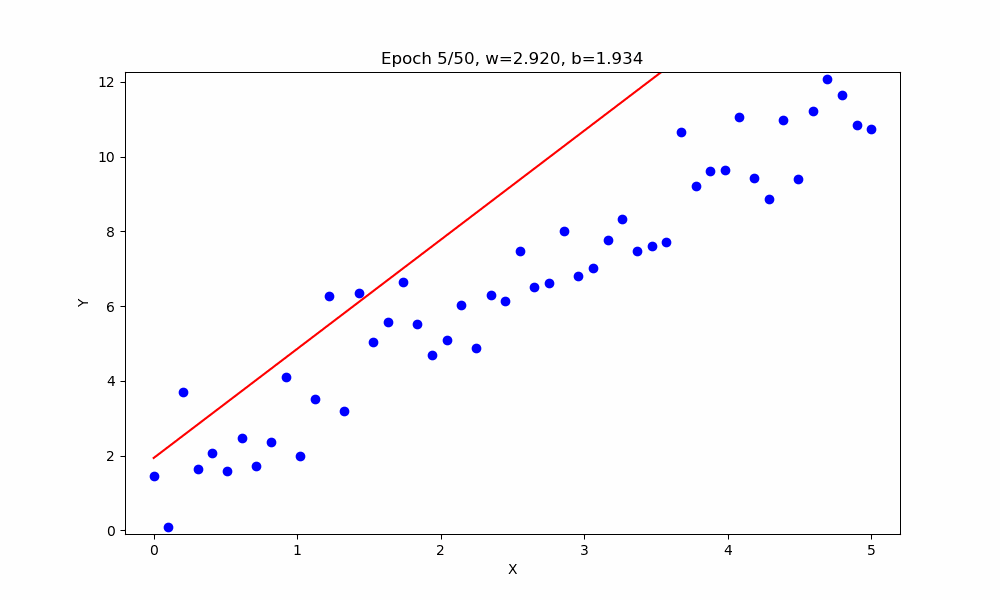

In [53]:
from IPython.display import Image, display

display(Image(filename='single_variable_lr.gif'))

In [54]:
layer = nn.Linear(in_features=6, out_features=2)
layer.weight, layer.bias

(Parameter containing:
 tensor([[-0.2108, -0.2783,  0.2166, -0.1650,  0.2478, -0.0969],
         [ 0.2335, -0.3172, -0.2060,  0.1245,  0.0863, -0.1041]],
        requires_grad=True),
 Parameter containing:
 tensor([0.2433, 0.2775], requires_grad=True))

In [55]:
import torch.nn as nn

class SingleVariableLinearRegressionWithNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

In [56]:
net = SingleVariableLinearRegressionWithNN()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [57]:
epochs = 50

net.train()
frames = []

X = X.view(-1, 1) # Remember our X should of shape (N, in_dim), or (N, 1) here
y = y.view(-1, 1)

for i in range(epochs):
  out = net(X)
  loss_value = loss(out, y)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

  if (i+1) % 10 == 0:
    print(f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}')

  state_dict = net.state_dict()
  w = state_dict['linear.weight'].item()
  b = state_dict['linear.bias'].item()

  frames.append(gif_utils.plot_frame(X, y, net, i,
    title=f"Epoch {i+1}/{epochs}, w={w:.3f}, b={b:.3f}"))

gif.save(frames, "single_variable_lr_with_linear.gif", duration=1000)

Epoch 10/50, Loss: 4.7945
Epoch 20/50, Loss: 1.0357
Epoch 30/50, Loss: 0.9059
Epoch 40/50, Loss: 0.8930
Epoch 50/50, Loss: 0.8892


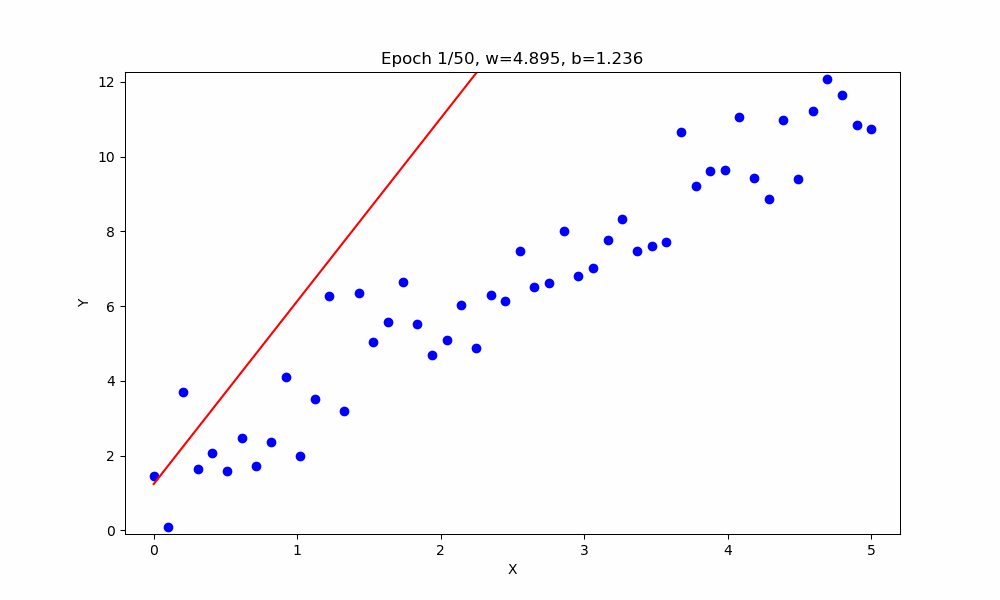

In [58]:
display(Image(filename='single_variable_lr_with_linear.gif'))

In [59]:
!wget https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/energy_data.csv

--2025-10-14 12:01:47--  https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/energy_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1131 (1.1K) [text/plain]
Saving to: ‘energy_data.csv’

energy_data.csv     100%[===================>]   1.10K  --.-KB/s    in 0s      

2025-10-14 12:01:48 (18.9 MB/s) - ‘energy_data.csv’ saved [1131/1131]



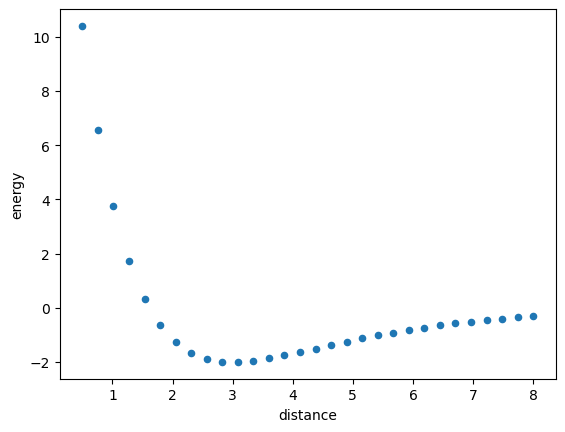

In [60]:
# Load data
import pandas as pd

df = pd.read_csv("energy_data.csv")
df.plot(x="distance", y="energy", kind="scatter");

In [61]:
net = SingleVariableLinearRegressionWithNN()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

Epoch 10/50, Loss: 6.8741
Epoch 20/50, Loss: 6.7712
Epoch 30/50, Loss: 6.6769
Epoch 40/50, Loss: 6.5901
Epoch 50/50, Loss: 6.5104


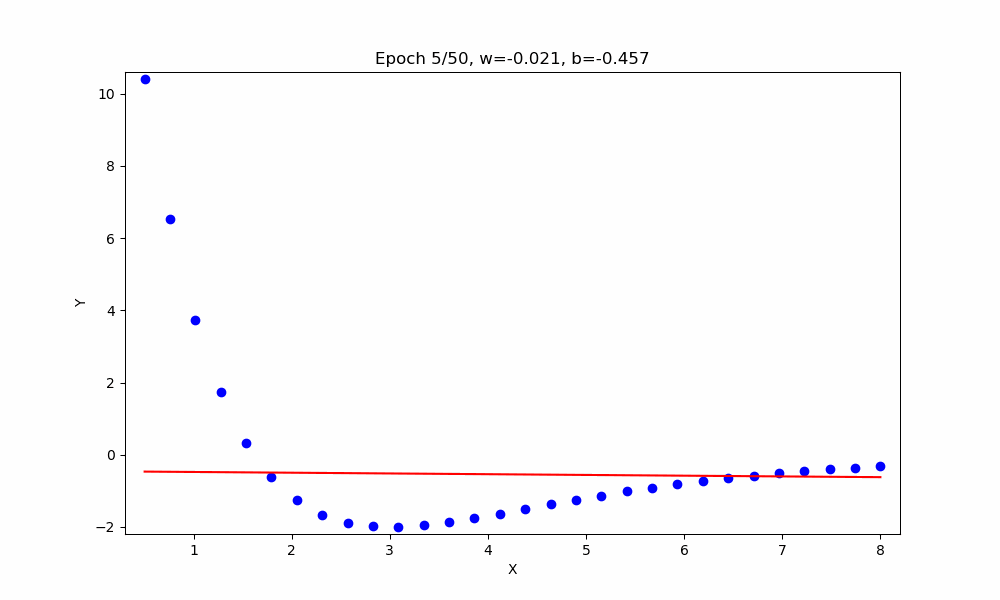

In [62]:
# Remember loading numpy arrays to tensors result in torch.float64
# while matrices in nn.Linear are of type torch.float32
X = torch.tensor(df['distance'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(df['energy'].values, dtype=torch.float32).view(-1, 1)

epochs = 50
frames = []

X = X.view(-1, 1) # Remember our X should be of shape (N, in_dim), or (N, 1) here
y = y.view(-1, 1)

for i in range(epochs):
  net.train()
  out = net(X)
  loss_value = loss(out, y)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

  if (i+1) % 10 == 0:
    print(f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}')

  state_dict = net.state_dict()
  w = state_dict['linear.weight'].item()
  b = state_dict['linear.bias'].item()

  if (i+1) % 5 == 0:
    frames.append(gif_utils.plot_frame(X, y, net, i,
      title=f"Epoch {i+1}/{epochs}, w={w:.3f}, b={b:.3f}"))

gif.save(frames, "linear_model_energy.gif", duration=1000)
display(Image(filename='linear_model_energy.gif'))

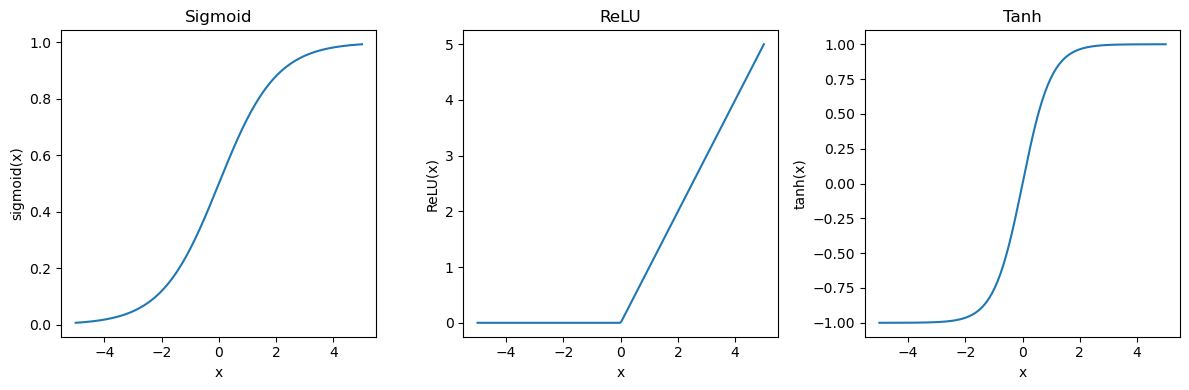

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 200)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Sigmoid
ax1.plot(x, sigmoid(x))
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('sigmoid(x)')

# ReLU
ax2.plot(x, relu(x))
ax2.set_title('ReLU')
ax2.set_xlabel('x')
ax2.set_ylabel('ReLU(x)')

# Tanh
ax3.plot(x, tanh(x))
ax3.set_title('Tanh')
ax3.set_xlabel('x')
ax3.set_ylabel('tanh(x)')

plt.tight_layout()
plt.show()

In [64]:
class NonLinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Sequential to aggregate multiple modules, simplifies defining the forward function
    self.layers = nn.Sequential(
        nn.Linear(in_features=1, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=1),
    )

  def forward(self, X):
    return self.layers(X)

In [65]:
net = NonLinearModel()
loss = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
net

NonLinearModel(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)

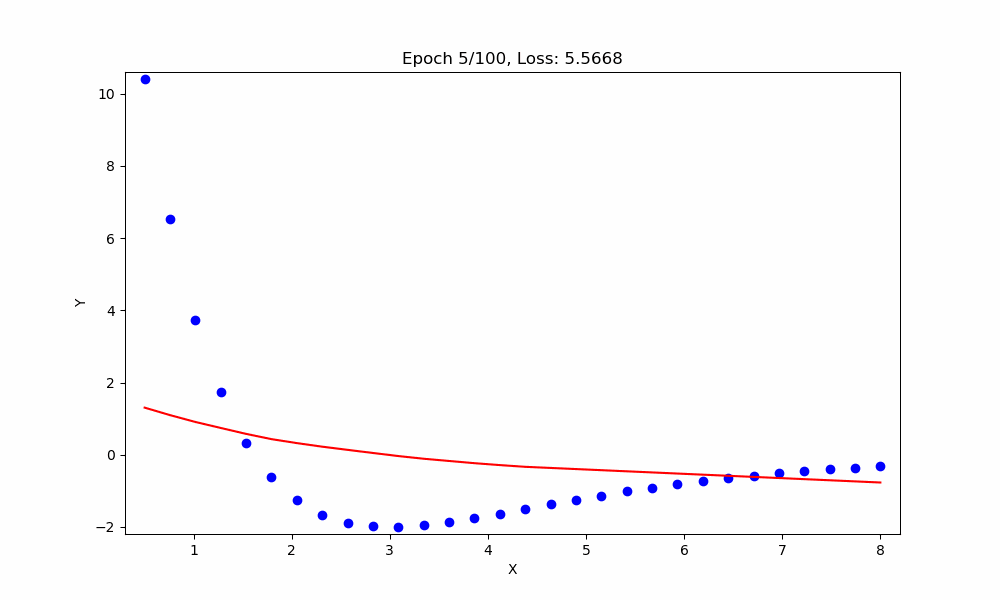

In [66]:
X = torch.tensor(df['distance'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(df['energy'].values, dtype=torch.float32).view(-1, 1)

epochs = 100
frames = []

for i in range(epochs):
  net.train()
  out = net(X)
  loss_value = loss(out, y)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

  if (i+1) % 5 == 0:
    frames.append(gif_utils.plot_frame(X, y, net, i,
                                     title=f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}'))

gif.save(frames, "nonlinear_model_energy.gif", duration=500)
display(Image(filename='nonlinear_model_energy.gif'))